### 5-  Analyte Classification on the  preprocessed data using Non-linear Support Vector Machine (SVM)
### Edgar Acuna
### June 2021

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time

In [2]:
df1=pd.read_csv("c://onr2020/NRLset1_part1.csv",header=None)
df2=pd.read_csv("c://onr2020/NRLset1_part2.csv",header=None)
df3=pd.read_csv("c://onr2020/NRLset1_part3.csv",header=None)
df4=pd.read_csv("c://onr2020/NRLset1_part4.csv",header=None)
df5=pd.read_csv("c://onr2020/NRLset1_part5.csv",header=None)
df6=pd.read_csv("c://onr2020/NRLset1_part6.csv",header=None)
df7=pd.read_csv("c://onr2020/NRLset1_part7.csv",header=None)
df8=pd.read_csv("c://onr2020/NRLset1_part8.csv",header=None)
y=pd.read_csv("c://onr2020/labels.csv",header=None)
ys=pd.read_csv("c://onr2020/substrateIDs.csv",header=None)
subs=pd.read_csv("c://onr2020/substrates.csv",header=None)
dfset1=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)
print('Size of the dataframe: {}'.format(dfset1.shape))

Size of the dataframe: (18000, 1701)


In [3]:
print('Size of the dataframe: {}'.format(subs.shape))

Size of the dataframe: (9, 1701)


In [4]:
dfset2=dfset1.copy()
dfset2['Analyte']=y
dfset2['substrate']=ys
dfsub1=dfset2[dfset2['substrate']==1]
dfsub2=dfset2[dfset2['substrate']==2]
dfsub3=dfset2[dfset2['substrate']==3]
dfsub4=dfset2[dfset2['substrate']==4]
dfsub5=dfset2[dfset2['substrate']==5]
dfsub6=dfset2[dfset2['substrate']==6]
dfsub7=dfset2[dfset2['substrate']==7]
dfsub8=dfset2[dfset2['substrate']==8]
dfsub9=dfset2[dfset2['substrate']==9]

In [5]:
mdfsub1=dfsub1.iloc[:,0:1701]
mdfsub2=dfsub2.iloc[:,0:1701]
mdfsub3=dfsub3.iloc[:,0:1701]
mdfsub4=dfsub4.iloc[:,0:1701]
mdfsub5=dfsub5.iloc[:,0:1701]
mdfsub6=dfsub6.iloc[:,0:1701]
mdfsub7=dfsub7.iloc[:,0:1701]
mdfsub8=dfsub8.iloc[:,0:1701]
mdfsub9=dfsub9.iloc[:,0:1701]

In [6]:
y1=subs.loc[0,:]
y2=subs.loc[1,:]
y3=subs.loc[2,:]
y4=subs.loc[3,:]
y5=subs.loc[4,:]
y6=subs.loc[5,:]
y7=subs.loc[6,:]
y8=subs.loc[7,:]
y9=subs.loc[8,:]

###  Centering

In [7]:
modsub1=mdfsub1.apply(lambda x : x -(np.sum(np.array(x)*np.array(y1))/np.sum(np.array(y1)*np.array(y1)))*y1,axis=1)
modsub2=mdfsub2.apply(lambda x : x -(np.sum(np.array(x)*np.array(y2))/np.sum(np.array(y2)*np.array(y2)))*y2,axis=1)
modsub3=mdfsub3.apply(lambda x : x -(np.sum(np.array(x)*np.array(y3))/np.sum(np.array(y3)*np.array(y3)))*y3,axis=1)
modsub4=mdfsub4.apply(lambda x : x -(np.sum(np.array(x)*np.array(y4))/np.sum(np.array(y4)*np.array(y4)))*y4,axis=1)
modsub5=mdfsub5.apply(lambda x : x -(np.sum(np.array(x)*np.array(y5))/np.sum(np.array(y5)*np.array(y5)))*y5,axis=1)
modsub6=mdfsub6.apply(lambda x : x -(np.sum(np.array(x)*np.array(y6))/np.sum(np.array(y6)*np.array(y6)))*y6,axis=1)
modsub7=mdfsub7.apply(lambda x : x -(np.sum(np.array(x)*np.array(y7))/np.sum(np.array(y7)*np.array(y7)))*y7,axis=1)
modsub8=mdfsub8.apply(lambda x : x -(np.sum(np.array(x)*np.array(y8))/np.sum(np.array(y8)*np.array(y8)))*y8,axis=1)
modsub9=mdfsub9.apply(lambda x : x -(np.sum(np.array(x)*np.array(y9))/np.sum(np.array(y9)*np.array(y9)))*y9,axis=1)

In [8]:
subdf=[modsub1,modsub2,modsub3,modsub4,modsub5,modsub6,modsub7,modsub8,modsub9]
cent_subs=pd.concat(subdf)
cent_subs.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
4,0.002296,0.002603,0.002368,0.003507,0.003637,0.003537,0.004850,0.005059,0.004744,0.006244,...,-0.001858,-0.002531,-0.002143,-0.004422,-0.003123,-0.000884,-0.001225,-0.001406,-0.002792,-0.002432
5,-0.005471,0.003865,0.000351,-0.000060,-0.000258,-0.000582,0.002557,0.003072,0.000961,0.003941,...,-0.004245,-0.001915,-0.005149,-0.001717,-0.003814,-0.003100,-0.000355,-0.000540,-0.005481,-0.000857
8,-0.002496,0.016867,0.014204,0.005327,0.003649,0.006143,-0.015160,0.004201,0.003791,0.004599,...,0.002574,-0.018040,-0.018488,-0.006529,0.009548,0.004694,0.000399,0.018158,0.016369,0.007582
28,0.001313,0.001443,0.001536,0.001612,0.001687,0.001768,0.001866,0.001979,0.002079,0.002155,...,-0.004576,-0.004550,-0.004524,-0.004502,-0.004476,-0.004446,-0.004411,-0.004373,-0.004332,-0.004301
46,-0.001097,0.000040,0.001125,0.002056,0.001685,0.002006,0.000228,0.001179,0.001835,0.002005,...,-0.004655,-0.006438,-0.005102,-0.005563,-0.004804,-0.005517,-0.004411,-0.005738,-0.005031,-0.005584


### Normalization

In [9]:
b=cent_subs.iloc[:,0:1701]
b.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
4,0.002296,0.002603,0.002368,0.003507,0.003637,0.003537,0.004850,0.005059,0.004744,0.006244,...,-0.001858,-0.002531,-0.002143,-0.004422,-0.003123,-0.000884,-0.001225,-0.001406,-0.002792,-0.002432
5,-0.005471,0.003865,0.000351,-0.000060,-0.000258,-0.000582,0.002557,0.003072,0.000961,0.003941,...,-0.004245,-0.001915,-0.005149,-0.001717,-0.003814,-0.003100,-0.000355,-0.000540,-0.005481,-0.000857
8,-0.002496,0.016867,0.014204,0.005327,0.003649,0.006143,-0.015160,0.004201,0.003791,0.004599,...,0.002574,-0.018040,-0.018488,-0.006529,0.009548,0.004694,0.000399,0.018158,0.016369,0.007582
28,0.001313,0.001443,0.001536,0.001612,0.001687,0.001768,0.001866,0.001979,0.002079,0.002155,...,-0.004576,-0.004550,-0.004524,-0.004502,-0.004476,-0.004446,-0.004411,-0.004373,-0.004332,-0.004301
46,-0.001097,0.000040,0.001125,0.002056,0.001685,0.002006,0.000228,0.001179,0.001835,0.002005,...,-0.004655,-0.006438,-0.005102,-0.005563,-0.004804,-0.005517,-0.004411,-0.005738,-0.005031,-0.005584


In [10]:
#normalize(b)
b1=b.apply(lambda x: x/(x**2).sum()**.5, axis=1)
b1.shape

(18000, 1701)

In [11]:
a1=np.array(dfsub1['Analyte'].values.tolist())
a2=np.array(dfsub2['Analyte'].values.tolist())
a3=np.array(dfsub3['Analyte'].values.tolist())
a4=np.array(dfsub4['Analyte'].values.tolist())
a5=np.array(dfsub5['Analyte'].values.tolist())
a6=np.array(dfsub6['Analyte'].values.tolist())
a7=np.array(dfsub7['Analyte'].values.tolist())
a8=np.array(dfsub8['Analyte'].values.tolist())
a9=np.array(dfsub9['Analyte'].values.tolist())
y=np.concatenate((a1,a2,a3,a4,a5,a6,a7,a8,a9),axis=None)
print(len(y))

18000


In [12]:
#y=dfsub1['Analyte']
#print(y.value_counts())
X=b1.iloc[:,0:1701]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)
#clf=svm.svmSVC(max_iter=2000)
start_time = time.time()
clf=svm.SVC()
clf.fit(X_train, y_train) 
predictions = clf.predict(X_test)
print("F1-score is=",f1_score(y_test,predictions, average="weighted"))
print("precision=",precision_score(y_test,predictions,average="weighted"))
print("The accuracy is=",clf.score(X_test,y_test))
print("--- %s seconds ---" % (time.time() - start_time))
#Calculating metrics for each class
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

F1-score is= 0.9370708742865086
precision= 0.9572656101034587
The accuracy is= 0.9277777777777778
--- 207.0316505432129 seconds ---
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        84
           2       1.00      0.94      0.97       107
           3       1.00      0.94      0.97        96
           4       0.96      0.84      0.90        90
           5       1.00      0.96      0.98       103
           6       1.00      0.96      0.98        80
           7       1.00      0.96      0.98        85
           8       1.00      0.94      0.97        90
           9       0.99      0.92      0.95        79
          10       1.00      0.91      0.95        81
          11       1.00      0.92      0.96        99
          12       0.91      0.98      0.94        89
          13       0.86      0.83      0.85        83
          14       0.97      0.94      0.95        95
          15       0.96      0

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
# Binarize the output
y1=label_binarize(y,classes=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,\
                            29,30,31,32,33,34,35,36,37,38,39,40])
n_classes = y1.shape[1]

In [14]:
# Learn to predict each class against the other
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=.2, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)
start_time = time.time()
classifier = OneVsRestClassifier(svm.SVC())   
y_score = classifier.fit(X_train, y_train).predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 833.0607385635376 seconds ---


In [15]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


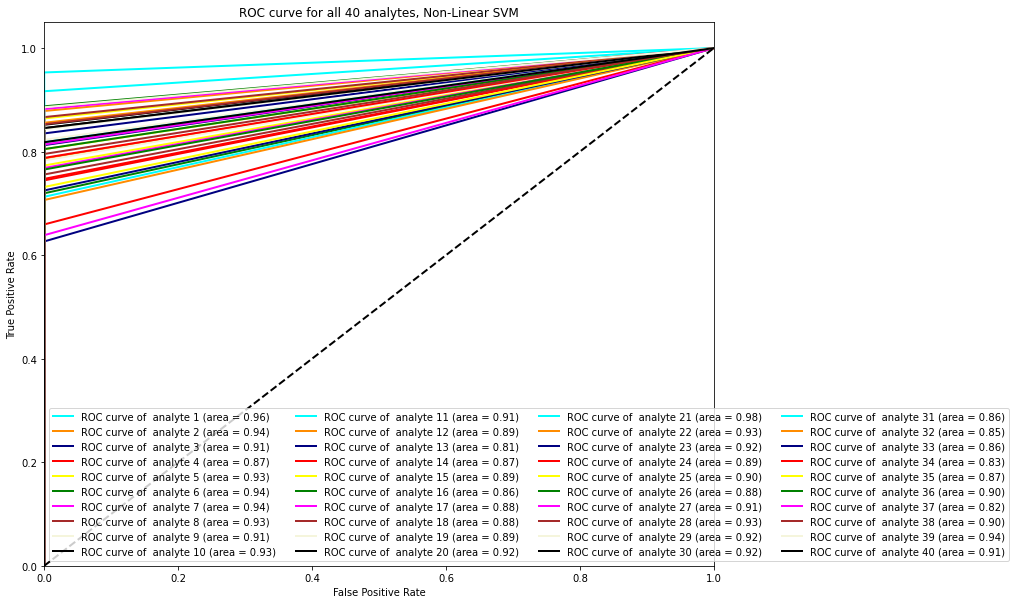

In [16]:
# First aggregate all false positive rates
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import cycle
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Plot all ROC curves
plt.figure(figsize=[12,10])
lw=2
colors = cycle(['cyan', 'darkorange', 'navy','red','yellow','green','magenta','brown','beige','black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of  analyte {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for all 40 analytes, Non-Linear SVM')
plt.legend(loc="best",ncol=4)
plt.show()

### Computing other metrics

In [17]:
#All the 40 analyzed are classified using a binary imbalanced  classification
labels=list(range(1,41))
start_time = time.time()
for j in labels:
    yclass=y.copy()
    yclass[yclass!=j]=0 
    yclass[yclass==j]=1
    X_train, X_test, yclass_train, yclass_test = train_test_split(X,yclass,test_size=0.2,random_state=0)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train= scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    clf=svm.SVC()
    clf.fit(X_train, yclass_train) 
    predictions = clf.predict(X_test)
    print("Metrics for predicting analyte %d : accuracy=%.3f, F1-score=%.3f, Precision=%.3f" %(j, clf.score(X_test,yclass_test), f1_score(yclass_test,predictions),precision_score(yclass_test,predictions)))
print("--- %s seconds ---" % (time.time() - start_time))

Metrics for predicting analyte 1 : accuracy=0.998, F1-score=0.957, Precision=1.000
Metrics for predicting analyte 2 : accuracy=0.996, F1-score=0.935, Precision=1.000
Metrics for predicting analyte 3 : accuracy=0.995, F1-score=0.897, Precision=1.000
Metrics for predicting analyte 4 : accuracy=0.994, F1-score=0.854, Precision=1.000
Metrics for predicting analyte 5 : accuracy=0.996, F1-score=0.927, Precision=1.000
Metrics for predicting analyte 6 : accuracy=0.998, F1-score=0.940, Precision=1.000
Metrics for predicting analyte 7 : accuracy=0.997, F1-score=0.938, Precision=1.000
Metrics for predicting analyte 8 : accuracy=0.997, F1-score=0.929, Precision=1.000
Metrics for predicting analyte 9 : accuracy=0.996, F1-score=0.903, Precision=1.000
Metrics for predicting analyte 10 : accuracy=0.997, F1-score=0.920, Precision=1.000
Metrics for predicting analyte 11 : accuracy=0.995, F1-score=0.900, Precision=1.000
Metrics for predicting analyte 12 : accuracy=0.995, F1-score=0.881, Precision=1.000
M

#### Analytes 13, 34 and 37 have F1-score are below .800

### PCA before classification

In [22]:
dfset3=b1.copy()
pca = PCA(n_components=50)
pca_result = pca.fit_transform(dfset3)
pca_result.shape

(18000, 50)

In [23]:
clf=svm.SVC()
scaler = StandardScaler()
scaler.fit(pca_result)
Xt=scaler.transform(pca_result)
clf.fit(Xt,y)
print("Accuracy estimated by resubstitution", clf.score(Xt, y))

Accuracy estimated by resubstitution 0.9948888888888889


In [24]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(pca_result,y,test_size=0.2,random_state=0)
scaler = StandardScaler()
scaler.fit(Xc_train)
Xc_train= scaler.transform(Xc_train)
Xc_test = scaler.transform(Xc_test)
start_time = time.time()
clf=svm.SVC()
clf.fit(Xc_train,yc_train)
predictions = clf.predict(Xc_test)
print("F1-score is=",f1_score(yc_test,predictions, average="weighted"))
print("precision=",precision_score(yc_test,predictions,average="weighted"))
print("The accuracy is=",clf.score(Xc_test,yc_test))
print("--- %s seconds ---" % (time.time() - start_time))

F1-score is= 0.9343420055832419
precision= 0.9401385898146171
The accuracy is= 0.9322222222222222
--- 8.860768795013428 seconds ---


In [21]:
#All the forty analytes are analyzed
labels=list(range(1,41))
start_time = time.time()
for j in labels:
    yclass=y.copy()
    yclass[yclass!=j]=0 
    yclass[yclass==j]=1
    X_train, X_test, yclass_train, yclass_test = train_test_split(pca_result,yclass,test_size=0.2,random_state=0)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train= scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    clf=svm.SVC()
    clf.fit(X_train, yclass_train) 
    predictions = clf.predict(X_test)
    print("Metrics for predicting analyte %d : accuracy=%.3f, F1-score=%.3f, Precision=%.3f" %(j, clf.score(X_test,yclass_test), f1_score(yclass_test,predictions),precision_score(yclass_test,predictions)))
print("--- %s seconds ---" % (time.time() - start_time))

Metrics for predicting analyte 1 : accuracy=0.999, F1-score=0.969, Precision=1.000
Metrics for predicting analyte 2 : accuracy=0.999, F1-score=0.981, Precision=1.000
Metrics for predicting analyte 3 : accuracy=0.998, F1-score=0.968, Precision=1.000
Metrics for predicting analyte 4 : accuracy=0.996, F1-score=0.922, Precision=1.000
Metrics for predicting analyte 5 : accuracy=0.999, F1-score=0.980, Precision=1.000
Metrics for predicting analyte 6 : accuracy=0.999, F1-score=0.974, Precision=1.000
Metrics for predicting analyte 7 : accuracy=0.999, F1-score=0.982, Precision=1.000
Metrics for predicting analyte 8 : accuracy=0.999, F1-score=0.971, Precision=1.000
Metrics for predicting analyte 9 : accuracy=0.999, F1-score=0.967, Precision=1.000
Metrics for predicting analyte 10 : accuracy=0.999, F1-score=0.988, Precision=1.000
Metrics for predicting analyte 11 : accuracy=0.998, F1-score=0.969, Precision=1.000
Metrics for predicting analyte 12 : accuracy=0.998, F1-score=0.954, Precision=0.976
M